In [9]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np

# https://en.wikipedia.org/wiki/Audio_frequency
maxFrecuency = 20001
minFrecuency = 20
frequencyDifference = ctrl.Antecedent(
    np.arange(minFrecuency - maxFrecuency, maxFrecuency - minFrecuency, 1),
    "frequency",
)

# https://www.harpsatsang.com/harp_design/data/stringcalculator.html
maxLength = 121.5
minLength = 8
stringLength = ctrl.Antecedent(np.arange(minLength, maxLength, 1), "stringLength")

turn = ctrl.Consequent(np.arange(-5, 6, 1), "turn")

frequencyDifference.automf(names=["higher", "perfect", "lower"])
stringLength.automf(names=["small", "long"])

turn["fully_loosen"] = fuzz.trimf(turn.universe, [-5, -5, 0])
turn["slightly_loosen"] = fuzz.trimf(turn.universe, [-2.5, -2.5, 0])
turn["slightly_tighten"] = fuzz.trimf(turn.universe, [0, 2.5, 2.5])
turn["fully_tighten"] = fuzz.trimf(turn.universe, [0, 5, 5])

rule1 = ctrl.Rule(
    frequencyDifference["higher"] & stringLength["long"], turn["fully_loosen"]
)
rule2 = ctrl.Rule(
    frequencyDifference["higher"] & stringLength["small"], turn["slightly_loosen"]
)
rule3 = ctrl.Rule(
    frequencyDifference["lower"] & stringLength["small"], turn["slightly_tighten"]
)
rule4 = ctrl.Rule(
    frequencyDifference["lower"] & stringLength["long"], turn["fully_tighten"]
)

turn_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
turner = ctrl.ControlSystemSimulation(turn_ctrl)


c:\Users\Sergio\Escritorio\RAin_proyect\RAIN-StringTuner\.venv\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


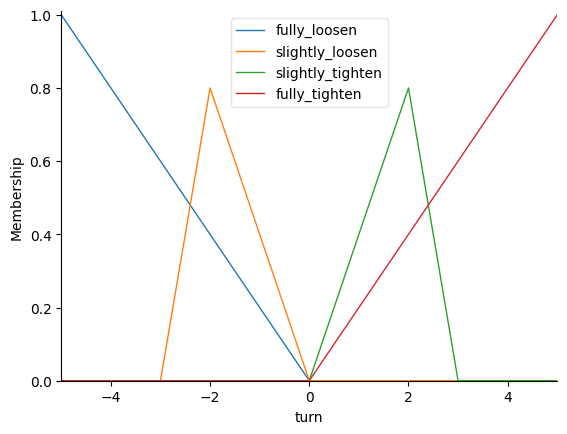

In [10]:
turn.view()

c:\Users\Sergio\Escritorio\RAin_proyect\RAIN-StringTuner\.venv\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


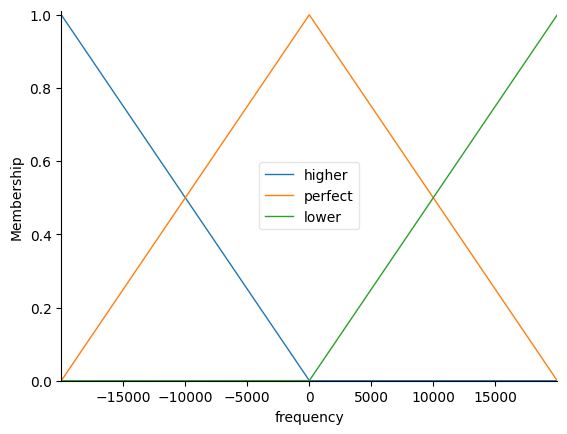

In [11]:
frequencyDifference.view()

c:\Users\Sergio\Escritorio\RAin_proyect\RAIN-StringTuner\.venv\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


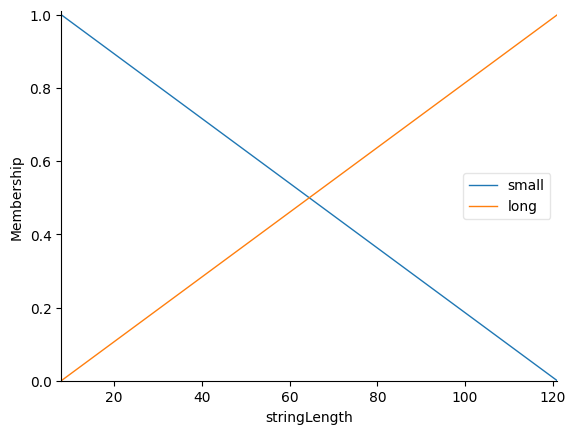

In [12]:
stringLength.view()